# Convolution Neural Network

In [1]:
import tensorflow as tf
from tensorflow.keras import utils, datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        # tf.config.experimental.set_visible_devices(gpus[2], 'GPU')
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


## MNIST

In [4]:
# Download and prepare the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
print('shape of train_images:', train_images.shape)
print('shape of train_labels:', train_labels.shape)

11501568/11490434 [==============================] - 1s 0us/step
shape of train_images: (60000, 28, 28)
shape of train_labels: (60000,)


### Softmax Regression on MNIST

In [5]:
# flating the training data for dense layers
train_images_1 = train_images.reshape((60000, -1))
test_images_1 = test_images.reshape((10000, -1))
print(train_images_1.shape)
print(test_images_1.shape)

(60000, 784)
(10000, 784)


In [6]:
model_1 = models.Sequential()
model_1.add(layers.Dense(10, activation='softmax',input_shape=(784,)))
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [7]:
# compile the model and train it for 5 epochs
model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_1.fit(train_images_1, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4674 - accuracy: 0.8781
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3042 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2832 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2732 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.9260


In [8]:
_, test_acc_1 = model_1.evaluate(test_images_1, test_labels, verbose=0)
print('Testing Accuracy : %.4f'%test_acc_1)

Testing Accuracy : 0.9270


### Multilayer Convolutional Network on MNIST

In [11]:
# reshaping the training data to 3 dimensions
train_images_2 = train_images.reshape((60000, 28, 28, 1))
test_images_2 = test_images.reshape((10000, 28, 28, 1))
print(train_images_2.shape)
print(test_images_2.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [12]:
#The 6 lines of code below define the convolutional base using a common pattern: a stack of Conv2D and MaxPooling2D layers.
model_2 = models.Sequential()
model_2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [13]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [14]:
model_2.add(layers.Flatten())
model_2.add(layers.Dense(64, activation='relu'))
model_2.add(layers.Dropout(0.5))
model_2.add(layers.Dense(10, activation='softmax'))

In [15]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [16]:
model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_2.fit(train_images_2, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 5ms/step - loss: 0.2767 - accuracy: 0.9143
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0913 - accuracy: 0.9753
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0653 - accuracy: 0.9819
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0518 - accuracy: 0.9858
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0430 - accuracy: 0.9881


In [17]:
_, test_acc_2 = model_2.evaluate(test_images_2, test_labels, verbose=0)
print('Testing Accuracy : %.4f'%test_acc_2)

Testing Accuracy : 0.9926


## Cifar-10

In [20]:
# Loading Data
import math

(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# convert class vectors to binary vectors
Y_train = utils.to_categorical(y_train)
Y_test = utils.to_categorical(y_test)

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)

170508288/170498071 [==============================] - 418s 2us/step
X_train shape: (50000, 32, 32, 3)
Y_train shape: (50000, 10)
X_test shape: (10000, 32, 32, 3)
Y_test shape: (10000, 10)


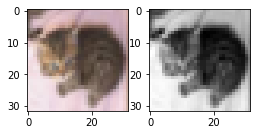

In [21]:
# transform a 3-channel image into one channel
def grayscale(data, dtype='float32'):
    # luma coding weighted average in video systems
    r = np.asarray(.3, dtype=dtype)
    g = np.asarray(.59, dtype=dtype)
    b = np.asarray(.11, dtype=dtype)
    rst = r * data[:, :, :, 0] + g * data[:, :, :, 1] + b * data[:, :, :, 2]
    # add channel dimension
    rst = np.expand_dims(rst, axis=3)
    return rst

X_train_gray = grayscale(X_train)
X_test_gray = grayscale(X_test)

# plot a randomly chosen image
img = round(np.random.rand() * X_train.shape[0])
plt.figure(figsize=(4, 2))
plt.subplot(1, 2, 1)
plt.imshow(X_train[img], interpolation='none')
plt.subplot(1, 2, 2)
plt.imshow(
    X_train_gray[img, :, :, 0], cmap=plt.get_cmap('gray'), interpolation='none')
plt.show()

### Feature Selection

In [22]:
def getHOGfeat(image,
               stride=8,
               orientations=8,
               pixels_per_cell=(8, 8),
               cells_per_block=(2, 2)):
    cx, cy = pixels_per_cell
    bx, by = cells_per_block
    sx, sy, sz = image.shape
    n_cellsx = int(np.floor(sx // cx))  # number of cells in x
    n_cellsy = int(np.floor(sy // cy))  # number of cells in y
    n_blocksx = (n_cellsx - bx) + 1
    n_blocksy = (n_cellsy - by) + 1
    gx = np.zeros((sx, sy), dtype=np.double)
    gy = np.zeros((sx, sy), dtype=np.double)
    eps = 1e-5
    grad = np.zeros((sx, sy, 2), dtype=np.double)
    for i in range(1, sx - 1):
        for j in range(1, sy - 1):
            gx[i, j] = image[i, j - 1] - image[i, j + 1]
            gy[i, j] = image[i + 1, j] - image[i - 1, j]
            grad[i, j, 0] = np.arctan(gy[i, j] / (gx[i, j] + eps)) * 180 / math.pi
            if gx[i, j] < 0:
                grad[i, j, 0] += 180
            grad[i, j, 0] = (grad[i, j, 0] + 360) % 360
            grad[i, j, 1] = np.sqrt(gy[i, j] ** 2 + gx[i, j] ** 2)
    normalised_blocks = np.zeros((n_blocksy, n_blocksx, by * bx * orientations))
    for y in range(n_blocksy):
        for x in range(n_blocksx):
            block = grad[y * stride:y * stride + 16, x * stride:x * stride + 16]
            hist_block = np.zeros(32, dtype=np.double)
            eps = 1e-5
            for k in range(by):
                for m in range(bx):
                    cell = block[k * 8:(k + 1) * 8, m * 8:(m + 1) * 8]
                    hist_cell = np.zeros(8, dtype=np.double)
                    for i in range(cy):
                        for j in range(cx):
                            n = int(cell[i, j, 0] / 45)
                            hist_cell[n] += cell[i, j, 1]
                    hist_block[(k * bx + m) * orientations:(k * bx + m + 1) * orientations] = hist_cell[:]
            normalised_blocks[y, x, :] = hist_block / np.sqrt(
                hist_block.sum() ** 2 + eps)
    return normalised_blocks.ravel()

In [23]:
X_train_hog = []
X_test_hog = []

print('This will take some minutes.')

for img in X_train_gray:
    img_hog = getHOGfeat(img)
    X_train_hog.append(img_hog)

for img in X_test_gray:
    img_hog = getHOGfeat(img)
    X_test_hog.append(img_hog)

X_train_hog_array = np.asarray(X_train_hog)
X_test_hog_array = np.asarray(X_test_hog)

This will take some minutes.


### KNN on CIFAR-10

In [24]:
# KNN
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score

# p=2 and metric='minkowski' means the Euclidean Distance
knn = KNeighborsClassifier(n_neighbors=11, p=2, metric='minkowski')

knn.fit(X_train_hog_array, y_train.ravel())
y_pred = knn.predict(X_test_hog_array)
print('[KNN]')
print('Misclassified samples: %d' % (y_test.ravel() != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

[KNN]
Misclassified samples: 5334
Accuracy: 0.47


### SVM on CIFAR-10

In [25]:
# SVM
from sklearn.svm import SVC 

# C is the hyperparameter for the error penalty term
# gamma is the hyperparameter for the rbf kernel
svm_linear = SVC(kernel='linear', random_state=0, gamma=0.2, C=10.0)

svm_linear.fit(X_train_hog_array, y_train.ravel())
y_pred = svm_linear.predict(X_test_hog_array)
print('[Linear SVC]')
print('Misclassified samples: %d' % (y_test.ravel() != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test.ravel(), y_pred))

[Linear SVC]
Misclassified samples: 4940
Accuracy: 0.51


### CNN on CIFAR-10

In [26]:
model_3 = models.Sequential()
model_3.add(layers.Conv2D(64, (5, 5), padding='same', activation='relu', input_shape=(32, 32, 3)))
model_3.add(layers.MaxPool2D(pool_size=3,strides=2,padding='same'))
model_3.add(layers.BatchNormalization())
                
model_3.add(layers.Conv2D(64, (5, 5), padding='same', activation='relu'))
model_3.add(layers.MaxPool2D(pool_size=3,strides=2,padding='same'))
model_3.add(layers.BatchNormalization())
                
model_3.add(layers.Flatten())
model_3.add(layers.Dense(384, activation='relu'))
model_3.add(layers.Dropout(0.5))
model_3.add(layers.Dense(192, activation='relu'))
model_3.add(layers.Dense(10, activation='softmax'))
model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_3.fit(X_train, y_train, epochs=200,validation_data=(X_test, y_test),verbose=0)

In [27]:
_, test_acc_3 = model_3.evaluate(X_test, y_test, verbose=0)
print('Testing Accuracy : %.4f'%test_acc_3)

Testing Accuracy : 0.7875


## Input Pipeline

In [28]:
# number of samples
n_samples = 200

# an array with shape (n_samples, 5)
raw_data_a = np.random.rand(n_samples, 5)
# a list with length of n_samples from 0 to n_samples-1
raw_data_b = np.arange(n_samples)

In [29]:
# this tells the dataset that each row of raw_data_a is corresponding to each element of raw_data_b
raw_dataset = tf.data.Dataset.from_tensor_slices((raw_data_a, raw_data_b))
print(raw_dataset)

<TensorSliceDataset shapes: ((5,), ()), types: (tf.float64, tf.int32)>


### Apply Transformation

In [30]:
def preprocess_function(one_row_a, one_b):
    """
        Input: one slice of the dataset
        Output: modified slice
    """
    # Do some data preprocessing, you can also input filenames and load data in here
    # Here, we transform each row of raw_data_a to its sum and mean
    one_row_a = [tf.reduce_sum(one_row_a), tf.reduce_mean(one_row_a)]

    return one_row_a, one_b

In [31]:
raw_dataset = raw_dataset.map(preprocess_function, num_parallel_calls=tf.data.experimental.AUTOTUNE)
print(raw_dataset)

<ParallelMapDataset shapes: ((2,), ()), types: (tf.float64, tf.int32)>


In [32]:
dataset = raw_dataset.shuffle(16)

In [33]:
dataset = dataset.batch(2,drop_remainder=False)

In [34]:
dataset = dataset.repeat(2)

In [35]:
epochs = 3
cus_dataset = raw_dataset.batch(32)

for epoch in range(epochs):
    size = 0
    for batch in cus_dataset:
        size += 1
    print("End of epoch: %d, Batch size of this epoch: %d"%(epoch, size))

End of epoch: 0, Batch size of this epoch: 7
End of epoch: 1, Batch size of this epoch: 7
End of epoch: 2, Batch size of this epoch: 7


In [36]:
dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [37]:
# Here, we print the first 8 batches.
for i,elem in enumerate(dataset):
    print("Batch ", i, ", b are ", elem[1].numpy())
    if i==8:
        break

Batch  0 , b are  [12  5]
Batch  1 , b are  [ 9 11]
Batch  2 , b are  [7 0]
Batch  3 , b are  [16  3]
Batch  4 , b are  [10  8]
Batch  5 , b are  [ 4 17]
Batch  6 , b are  [13  2]
Batch  7 , b are  [26 23]
Batch  8 , b are  [31 29]


In [38]:
# Here, we print the first 8 batches.
it = iter(dataset)
for i in range(8):
    print("Batch ", i, ", b are ", next(it)[1].numpy())

Batch  0 , b are  [15  2]
Batch  1 , b are  [8 6]
Batch  2 , b are  [ 7 19]
Batch  3 , b are  [4 1]
Batch  4 , b are  [18 22]
Batch  5 , b are  [24 16]
Batch  6 , b are  [10 13]
Batch  7 , b are  [ 0 26]


In [39]:
# use this function to plot the size of each batch.
def plot_batch_sizes(ds,title):
    batch_sizes = [batch[1].shape[0] for batch in ds]
    plt.bar(range(len(batch_sizes)), batch_sizes)
    plt.xlabel('Batch number')
    plt.ylabel('Batch size')
    plt.title(title)
    plt.show()

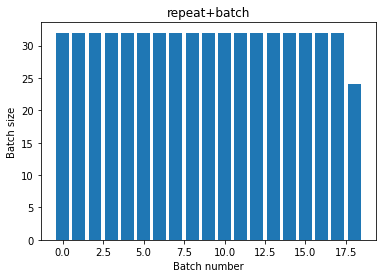

In [40]:
# plot the bar diagram of repeat+batch
repeat_batch_ds = raw_dataset.repeat(3).batch(32)
plot_batch_sizes(repeat_batch_ds,'repeat+batch')

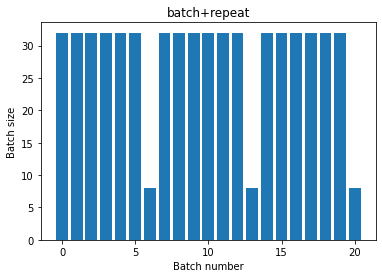

In [41]:
# plot the bar diagram of batch+repeat
batch_repeat_ds = raw_dataset.batch(32).repeat(3)
plot_batch_sizes(batch_repeat_ds,'batch+repeat')

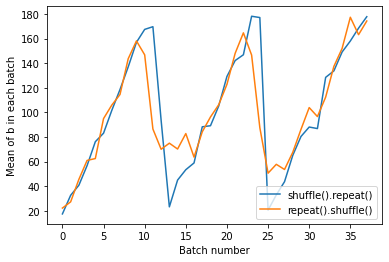

In [42]:
# You can find that a repeat before a shuffle mixes the epoch boundaries in this graph.
shuffle_repeat_ds = raw_dataset.shuffle(32).repeat(3).batch(16)
repeat_shuffle_ds = raw_dataset.repeat(3).shuffle(32).batch(16)

shuffle_repeat = [batch[1].numpy().mean() for batch in shuffle_repeat_ds]
repeat_shuffle = [batch[1].numpy().mean() for batch in repeat_shuffle_ds]

plt.plot(shuffle_repeat, label="shuffle().repeat()")
plt.plot(repeat_shuffle, label="repeat().shuffle()")
plt.xlabel('Batch number')
plt.ylabel("Mean of b in each batch")
plt.legend()

## CNN Model for CIFAR-10

### Loading Data Manually

In [43]:
import pickle

# the url to download CIFAR-10 dataset (binary version)
# see format and details here: http://www.cs.toronto.edu/~kriz/cifar.html
DATA_URL = 'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz'
# the image size we want to keep
IMAGE_SIZE_CROPPED = 24
IMAGE_HEIGHT = 32
IMAGE_WIDTH = 32
IMAGE_DEPTH = 3

In [44]:
# donwnload data
cifar10 = utils.get_file('cifar-10-python.tar.gz',
                                  cache_subdir=os.path.abspath('.'),
                                  origin = DATA_URL,
                                  extract = True)
DEST_DIRECTORY = os.path.join(os.path.dirname(cifar10),'cifar-10-batches-py')
filenames_train = [os.path.join(DEST_DIRECTORY,'data_batch_%d' % i) for i in range(1,6)]
filenames_test = [os.path.join(DEST_DIRECTORY,'test_batch')]

170508288/170498071 [==============================] - 445s 3us/step


In [45]:
# read data
def unpickle(file):
    with open(file, 'rb') as fo:
        raw_data = pickle.load(fo, encoding='bytes')
    return raw_data[b'data'],raw_data[b'labels']

# parse training data
def map_fun(image,label):
    image = tf.reshape(image,[IMAGE_DEPTH,IMAGE_HEIGHT,IMAGE_WIDTH])
    image = tf.divide(tf.cast(tf.transpose(image,[1,2,0]),tf.float32),255.0)
    label = tf.one_hot(label,10)
    distorted_image = tf.image.random_crop(image, [IMAGE_SIZE_CROPPED,IMAGE_SIZE_CROPPED,3])
    distorted_image = tf.image.random_flip_left_right(distorted_image)
    distorted_image = tf.image.random_brightness(distorted_image, max_delta=63)
    distorted_image = tf.image.random_contrast(
        distorted_image, lower=0.2, upper=1.8)
    distorted_image = tf.image.per_image_standardization(distorted_image)
    return distorted_image, label

# parse testing data
def map_fun_test(image,label):
    image = tf.reshape(image,[IMAGE_DEPTH,IMAGE_HEIGHT,IMAGE_WIDTH])
    image = tf.divide(tf.cast(tf.transpose(image,[1,2,0]),tf.float32),255.0)
    label = tf.one_hot(label,10)
    distorted_image = tf.image.resize_with_crop_or_pad(image, IMAGE_SIZE_CROPPED,IMAGE_SIZE_CROPPED)
    distorted_image = tf.image.per_image_standardization(distorted_image)
    return distorted_image, label

In [46]:
X_train = None
Y_train = None
X_test = None
Y_test = None

for filename in filenames_train:
    images,labels = unpickle(filename)
    X_train = images if X_train is None else np.concatenate((X_train,images))
    Y_train = labels if Y_train is None else np.concatenate((Y_train,labels))

for filename in filenames_test:
    images,labels = unpickle(filename)
    X_test = images if X_test is None else np.concatenate((X_test,images))
    Y_test = labels if Y_test is None else np.concatenate((Y_test,labels))

# Construct training Dataset
dataset = tf.data.Dataset.from_tensor_slices((X_train,Y_train))
dataset = dataset.map(map_fun)
dataset = dataset.shuffle(10000)
dataset = dataset.batch(64)

# # Construct testing Dataset
dataset_test = tf.data.Dataset.from_tensor_slices((X_test,Y_test))
dataset_test = dataset_test.map(map_fun_test)
dataset_test = dataset_test.batch(64)

In [47]:
model_cifar = models.Sequential()

model_cifar.add(layers.Conv2D(64, (5, 5), padding='same', activation='relu', input_shape=(24, 24, 3)))
model_cifar.add(layers.MaxPool2D(pool_size=3,strides=2,padding='same'))
model_cifar.add(layers.BatchNormalization())
                
model_cifar.add(layers.Conv2D(64, (5, 5), padding='same', activation='relu'))
model_cifar.add(layers.MaxPool2D(pool_size=3,strides=2,padding='same'))
model_cifar.add(layers.BatchNormalization())
                
model_cifar.add(layers.Flatten())
model_cifar.add(layers.Dense(384, activation='relu'))
model_cifar.add(layers.Dropout(0.5))
model_cifar.add(layers.Dense(192, activation='relu'))
model_cifar.add(layers.Dropout(0.5))
model_cifar.add(layers.Dense(10, activation='softmax'))

In [48]:
model_cifar.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_cifar.fit(dataset, epochs=200, validation_data=dataset_test, verbose=0)

In [49]:
_, test_acc = model_cifar.evaluate(dataset_test, verbose=0)
print('test accuracy:',test_acc)

test accuracy: 0.8438000082969666


## Using TFRecords

### tf.Example

In [50]:
# The following functions can be used to convert a value to a type compatible with tf.Example.

def _bytes_feature(value):
    """Returns a bytes_list from a string / byte."""
    if isinstance(value, type(tf.constant(0))):
        value = value.numpy() # BytesList won't unpack a string from an EagerTensor.
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
    """Returns a float_list from a float / double."""
    return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
    """Returns an int64_list from a bool / enum / int / uint."""
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

### Create a tf.Example message

In [51]:
# The number of samples in the dataset.
n_samples_ = int(1e4)

# Boolean feature, encoded as False or True.
feature0 = np.random.choice([False, True], n_samples_)

# Integer feature, random from 0 to 4.
feature1 = np.random.randint(0, 5, n_samples_)

# String feature
strings = np.array([b'cat', b'dog', b'chicken', b'horse', b'goat'])
feature2 = strings[feature1]

# Float feature, from a standard normal distribution
feature3 = np.random.randn(n_samples_)

In [52]:
def serialize_example(feature0, feature1, feature2, feature3):
    """
    Creates a tf.Example message ready to be written to a file.
    """
    # Create a dictionary mapping the feature name to the tf.Example-compatible data type.
    feature = {
        'feature0': _int64_feature(feature0),
        'feature1': _int64_feature(feature1),
        'feature2': _bytes_feature(feature2),
        'feature3': _float_feature(feature3),
    }

    # Create a Features message using tf.train.Example.
    example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
    
    return example_proto.SerializeToString()

### TFRecord files using tf.data

In [53]:
features_dataset = tf.data.Dataset.from_tensor_slices((feature0, feature1, feature2, feature3))
features_dataset

<TensorSliceDataset shapes: ((), (), (), ()), types: (tf.bool, tf.int32, tf.string, tf.float64)>

In [54]:
def tf_serialize_example(f0,f1,f2,f3):
    tf_string = tf.py_function(
        serialize_example,
        (f0,f1,f2,f3),  # pass these args to the above function.
        tf.string)      # the return type is `tf.string`.
    return tf.reshape(tf_string, ()) # The result is a scalar

In [55]:
serialized_features_dataset = features_dataset.map(tf_serialize_example)
serialized_features_dataset

<MapDataset shapes: (), types: tf.string>

In [56]:
filename = 'test.tfrecord'
writer = tf.data.experimental.TFRecordWriter(filename)
writer.write(serialized_features_dataset)

Instructions for updating:
To write TFRecords to disk, use `tf.io.TFRecordWriter`. To save and load the contents of a dataset, use `tf.data.experimental.save` and `tf.data.experimental.load`


In [57]:
filenames = [filename]
raw_dataset = tf.data.TFRecordDataset(filenames)
raw_dataset

<TFRecordDatasetV2 shapes: (), types: tf.string>

In [58]:
for raw_record in raw_dataset.take(3):
    print(repr(raw_record))

<tf.Tensor: shape=(), dtype=string, numpy=b'\nS\n\x11\n\x08feature0\x12\x05\x1a\x03\n\x01\x01\n\x11\n\x08feature1\x12\x05\x1a\x03\n\x01\x03\n\x14\n\x08feature3\x12\x08\x12\x06\n\x04\xbe\xf3J>\n\x15\n\x08feature2\x12\t\n\x07\n\x05horse'>
<tf.Tensor: shape=(), dtype=string, numpy=b'\nS\n\x14\n\x08feature3\x12\x08\x12\x06\n\x04\xcb2h?\n\x11\n\x08feature0\x12\x05\x1a\x03\n\x01\x00\n\x15\n\x08feature2\x12\t\n\x07\n\x05horse\n\x11\n\x08feature1\x12\x05\x1a\x03\n\x01\x03'>
<tf.Tensor: shape=(), dtype=string, numpy=b'\nR\n\x11\n\x08feature1\x12\x05\x1a\x03\n\x01\x04\n\x14\n\x08feature2\x12\x08\n\x06\n\x04goat\n\x11\n\x08feature0\x12\x05\x1a\x03\n\x01\x01\n\x14\n\x08feature3\x12\x08\x12\x06\n\x04e\xcdD?'>


In [59]:
# Create a description of the features.
feature_description = {
    'feature0': tf.io.FixedLenFeature([], tf.int64, default_value=0),
    'feature1': tf.io.FixedLenFeature([], tf.int64, default_value=0),
    'feature2': tf.io.FixedLenFeature([], tf.string, default_value=''),
    'feature3': tf.io.FixedLenFeature([], tf.float32, default_value=0.0),
}

def _parse_function(example_proto):
  # Parse the input `tf.Example` proto using the dictionary above.
  return tf.io.parse_single_example(example_proto, feature_description)

In [60]:
parsed_dataset = raw_dataset.map(_parse_function)
parsed_dataset

<MapDataset shapes: {feature0: (), feature1: (), feature2: (), feature3: ()}, types: {feature0: tf.int64, feature1: tf.int64, feature2: tf.string, feature3: tf.float32}>

In [61]:
for parsed_record in parsed_dataset.take(3):
    print(repr(parsed_record))

{'feature0': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'feature1': <tf.Tensor: shape=(), dtype=int64, numpy=3>, 'feature2': <tf.Tensor: shape=(), dtype=string, numpy=b'horse'>, 'feature3': <tf.Tensor: shape=(), dtype=float32, numpy=0.19819543>}
{'feature0': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'feature1': <tf.Tensor: shape=(), dtype=int64, numpy=3>, 'feature2': <tf.Tensor: shape=(), dtype=string, numpy=b'horse'>, 'feature3': <tf.Tensor: shape=(), dtype=float32, numpy=0.90702504>}
{'feature0': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'feature1': <tf.Tensor: shape=(), dtype=int64, numpy=4>, 'feature2': <tf.Tensor: shape=(), dtype=string, numpy=b'goat'>, 'feature3': <tf.Tensor: shape=(), dtype=float32, numpy=0.7687591>}


### TFRecord files in Python

In [62]:
# Write the `tf.Example` observations to the file.
with tf.io.TFRecordWriter(filename) as writer:
    for i in range(n_samples_):
        example = serialize_example(feature0[i], feature1[i], feature2[i], feature3[i])
        writer.write(example)

C:\Users\Che\AppData\Local\Temp/ipykernel_3328/1268583704.py:15: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))


In [63]:
filenames = [filename]
raw_dataset = tf.data.TFRecordDataset(filenames)
raw_dataset

<TFRecordDatasetV2 shapes: (), types: tf.string>

In [64]:
for raw_record in raw_dataset.take(1):
    example = tf.train.Example()
    example.ParseFromString(raw_record.numpy())
    print(example)

features {
  feature {
    key: "feature0"
    value {
      int64_list {
        value: 1
      }
    }
  }
  feature {
    key: "feature1"
    value {
      int64_list {
        value: 3
      }
    }
  }
  feature {
    key: "feature2"
    value {
      bytes_list {
        value: "horse"
      }
    }
  }
  feature {
    key: "feature3"
    value {
      float_list {
        value: 0.1981954276561737
      }
    }
  }
}

